Titanic - Machine Learning from Disaster

https://www.kaggle.com/competitions/titanic linkinde bulunan yarışmayı gerçekleştirelim.

# Introduction

The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")  #matplotlib'in bir style'ı var ve bunun seaborn-whitegrid tarzını kullanmak istiyoruz.
import seaborn as sns
from collections import Counter

#Python'dan kaynaklı hataları kapatmak için:
import warnings
warnings.filterwarnings("ignore")

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

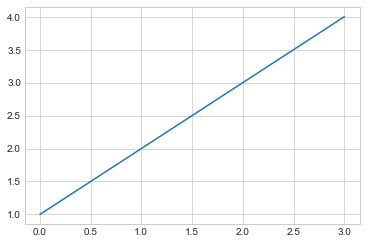

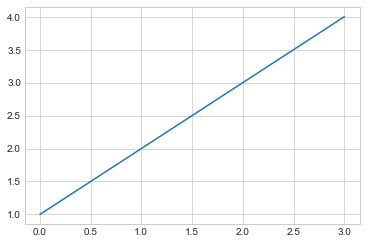

In [2]:
a=[1,2,3,4]
plt.plot(a)
plt.show

plt.style.use("seaborn-whitegrid")  satırı sayesinde yukarıdaki çıktıda bulunan grafiğin arka planında ızgara görünümü bulunmaktadır.

Peki başka tarzları nasıl elde edebiliriz?:

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Kullanabileceğimiz bütün tarzların listesi çıktıda görüldüğü gibidir.

<font color = 'Orange'>
1-LOAD AND CHECK DATA

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_PassengerId = test_df["PassengerId"]  #test_df'nin PassngerId feature'sinin orjinalini kaybetmemek için bir değişkene atadık.

Data'yı inceleyelim.

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Görüldüğü üzere 12 tane column yani feature mevcut.

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


df'nin ilk 5 satırını görüntüledik.

Çıktıyı okuyalım. Mesela Ticket sütunu bilet numarasını ifade eder. Fare sütunu bileti almak için ödenen tutarı ifade eder. Cabin sütunu hangi kabinde bulunulduğunu ifade eder. Embarked sütunu hangi limandan bu gemiye binildiğini ifade eder.

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Sayısal sütunlarla ilgili bazı istatistiksel bilgileri elde ettik.

Çıktıyı inceleyelim. Mesela maksimum 80 yaşında ve minimum 0.42 yaşında insanların bulunduğu bir gemi olduğu sonucuna varabiliriz.

<font color = 'Orange'>
2-VARIABLE DESCRIPTION

1- PassengerId

2- Survived

3- Pclass

4- Name

5- Sex

6- Age

7- SibSp

8- Parch

9- Ticket

10-Fare

11-Cabin

12-Embarked
    
Şimdi her birini veri seti üzerinde gözlemleyerek inceleyelim. 

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color = 'Brown'>
PassengerId : Bulunan yolcuların yolcu numarasını ifade eden feature'dir. Unique değerler barındırır.

Survived : 0 değeri yolcunun titanik kazası sonucunda öldüğünü ifade eder, 1 değeri yolcunun hayatta kaldığını ifade eder.

Pclass : 1,2 ve 3 değerlerini alabilir. 1 ddeğeri 1.sınıf, 2 değeri 2.sınıf ve 3 değeri 3.sınıf anlamına gelir. Yani yolcuların sınıflarını ifade eder.
    
Name : Yolcu ismini ifade eder.
    
Sex : Yolcuların cinsiyetlerini ifade eder.
    
Age : Yolcuların yaşlarını ifade eder.
    
SibSp : sib, siblings'in kısaltmasıdır ve anlamı kardeşlerdir. Sp ise Spouses'in kısaltmasıdır ve eş yani karı koca anlamındandır. Mesela Harris'in 1 tane kardeşi olduğunu anlayabiliriz.
    
Parch : par , parent'tır. ch ise children'dir. Mesela Harris'in Pach değeri 0 ve bunun anlamı, Harris'in çocuğuda yok aileside yok. Parch değerinin 1 olması, kişisin gemi içerisinde anne ve babası olmak üzere bir ailesi var ya da çocukları var anlamına gelir.
    
Ticket : Bilet numarasıdır.
    
Fare : Bu bileti almak için ödediğimiz para miktarıdır.
    
Cabin : Kişinin gemi içerisinde kaldığı oda numarasıdır.
    
Embarked : Gemiye hangi limandan binildiği bilgisidir. 3 adet liman var ve bunlar; C=Cherbourg, Q=Queenstown, S=Southampton şeklindedir.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

info() metodu ile veri seti hakkında bilgiler edinebiliriz.

Çıktıyı inceleyelim. pandas dataframe'ini kullandığımızı görüyoruz. 891 tane yolcu mevcut. 12 tane column var. Her bir column isimlerini ve column'da bulunan değerlerin veri tiplerini görebilmekteyiz. Toplamda 2 tane float, 5 tane int ve 5 tane string bulunduğunu görmekteyiz.

<font color = 'Orange'>
3-UNIVARIATE VARIABLE ANALYSIS

Değişkenleri birer birer incelicez. Univariate variable analysis yaparken iki kısma ayrıcaz:

    🟣 Categorical Variable Analysis
    
    🟣 Numerical Variable Analysis

<font color = 'Purple'>
    
🟣 Categorical Variable

Categorical variable: İki veya daha fazla kategoriden oluşan feature'lerdir. 

Mesela Survived feature'si categorical variable'dir. Çünkü iki adet farklı değer barındırır. 1=hayatta kalmıştır, 0=hayatta değildir.

Sex feature'si kadın ve erkek olmak üzere iki farklı değer barınıdırır.

Pclass feature'si 1.sınıf, 2.sınıf ve 3.sınıf olmak üzere 3 farklı değer barındırır.

Embarked feature'si C , Q ve S olmak üzere 3 farklı liman bilgisi barındırır.

Cabin fature'si, Name feature'si, Ticket feature'si, Sibsp feature'si ve Parch feature'si bir çok farklı kategoriye sahiptir.

Sonuç olarak:

    
<font color = 'Blue'>  
      Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp, Parch

<font color = 'Purple'>
🟣 Numerical Variable

Numerical Variable: Sayılardan oluşan değişkenlerdir.
    
Sonuç olarak:
    
    
<font color = 'Blue'> 
      Numerical Variable: Fare, age, passengerId

## Categorical Variable

Categorical variable'leri görselleştirmek için öğrendiğimiz yöntemlerden birisi olan matplotlib kütüphanesini kullanacağız ve bunun için bir metod yazalım.

In [10]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    var = train_df[variable]  #Cinsiyet (Sex) variable'sini kullanarak var isimli bir değişken oluşturduk. ve var değişkeni içerisinde cinsiyetleri bulunduruyor.
    varValue = var.value_counts()  #cinsiyetten kaç tane olması gerektiğini sağlıyor. 
    
    #Şimdide görselleştirelim.
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")  #y label kategorilere ait sample'lerin sayısıdır.
    plt.title(variable)
    plt.show()
    
    print("{}: \n {}".format(variable,varValue))

.value_counts() metodu ile feature'nin içerisinde kaç tane kategori olduğunu ve bu kategorilere ait kaç tane sample olduğu bilgisini elde edebiliriz.

Metodu kullanabilmek için gerekli olan kod satırını yazalım.

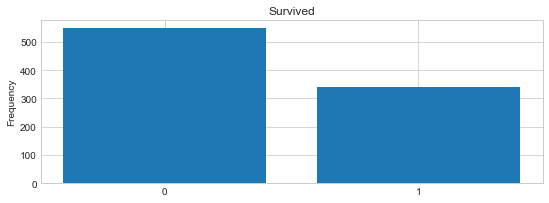

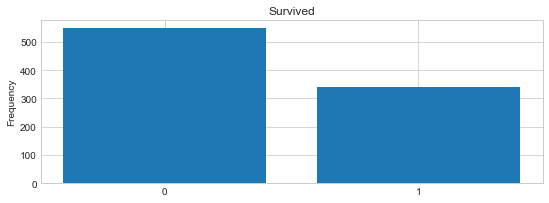

Survived: 
 0    549
1    342
Name: Survived, dtype: int64
Survived: 
 0    549
1    342
Name: Survived, dtype: int64


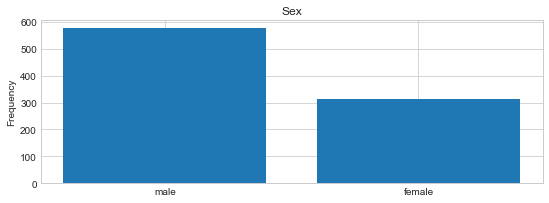

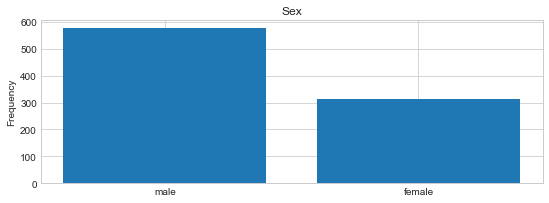

Sex: 
 male      577
female    314
Name: Sex, dtype: int64
Sex: 
 male      577
female    314
Name: Sex, dtype: int64


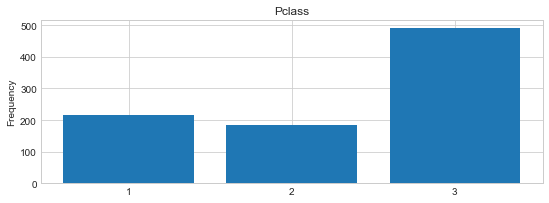

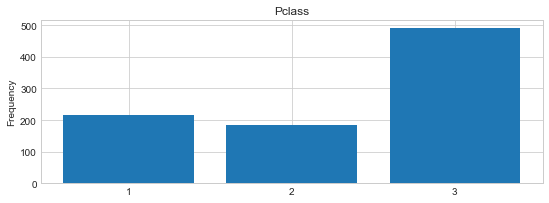

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64
Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


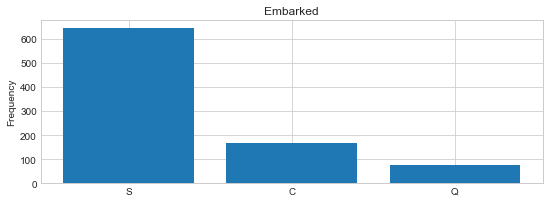

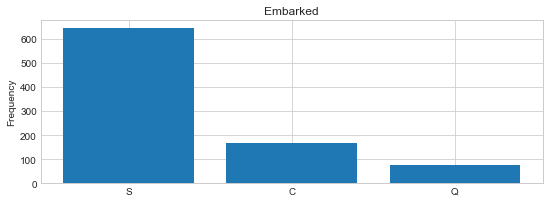

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64
Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


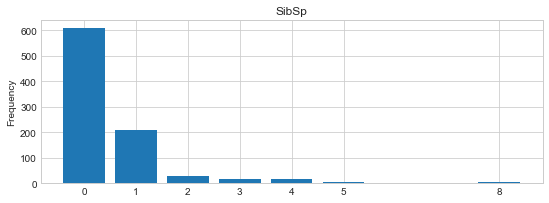

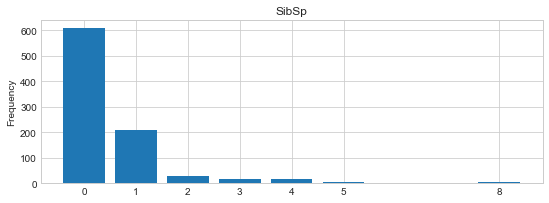

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


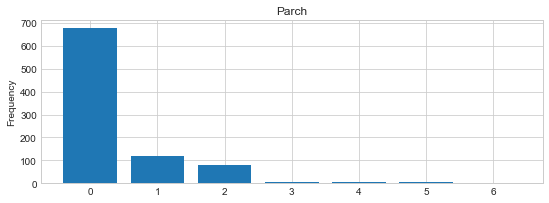

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


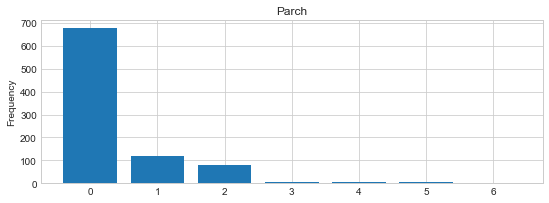

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [11]:
category1= ["Survived", "Sex", "Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

Çıktıda sırasıyla feature'leri elde ettik. Çıktıda bulunan bu feature'leri inceleyelim.

Survived feature'sinin içerisinde 2 tane kategori var. 0=hayatta kalmayanlar ve 1=hayatta kalanlar şeklinde 2 kategoriye sahip. 549 kişi hayatta kalmamıştır ve 342 kişi hayatta kalmıştır.

Survived variable'si ile ilgili şöyle bir yorum yapabiliriz; 891 tane yolcudan 549 tanesi hayatta kalmamış ve 342 tanesi hayatta kalmış Yani bunlar yarı yarıya değil. Sonuç olarak survived variable'sinin dengeli olmadığı yani unbalanced olduğu anlaşılır.

Sex feature'sini inceleyelim. Cinsiyet ile ilgili male ve female olmak üzere 2 tane kategori mevcut. 577 tanesi erkek ve 314 tanesi kadındır. Sex variable'si dengesiz bir dağılıma sahiptir. Mesela bir yolcu geldiğinde bu yolcunun cinsiyetini tahmin etmek istersek, Sex dağılım oranlarına göre yolcu erkektir diyebiliriz.

Pclass feature'sini inceleyelim. 1.sınıf (en zenginler) , 2.sınıf (ortalar) ve 3.sınıf (en fakirler) olmak üzere 3 tane kategori mevcut. 3.sınıfa ait 491 tane yolcu, 1.sınıfa ait 216 tane yolcu ve 2.sınıfa ait 184 tane yolcu vardır. 

Embarked feature'sini inceleyelim. 3 tane kategori mevcut. S limanından 644 tane, C limanından 168 tane ve Q limanından 77 tane yolcu binmiş.

Mesela şöyle bir yoruma ulaşabiliriz. Pclass feature'si ile Embarked feature'si arasında bir ilişki kurabiliriz. Embarked feature'sinin Q limanından çok az sayıda yolcu binmiş. Pclass feature'sindede 1.sınıfta kalan yolcuların az sayıda olduğu görülmekte. Dolayısıyla 1.sınıfta kalan yolcuların limanı Q olabilir diyebiliriz. 

SibSp feature'sini inceleyelim. / tane kategori var. Hiç kardeşi olmayan (0 kategorisi) 608 kişiymiş. 1 tane kardeşi ya da eşi (1 kategorisi) olan yolcu sayısı 209 kişiymiş. 

Parch feature'sini inceleyelim. 7 tane kategori var. 678 kişinin diğer insanlarla bir bağlantısı yokmuş (0 kategorisi).

Categorical olduğunu bildiğimiz ama görselleştirme yaptığımızda karmaşa yaratacağından emin olduğumuz geri kalan categorical variable'leri anlatalım.

In [12]:
category2 = ["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 

B96 B98        4
G6           

Çıktıda Cabin, Name ve Ticket feature'lerine ait kaç adet kategori olduğunu görebiliyoruz.

Mesela B96 B98 kategorisinden 4 tane varmış. G6 kategorisinden 4 tane varmış.

## Numerical Variable

Numerical variable yapabilmemiz için histogram plot ettiren bir metod yazacağız. Öncesinde histogramın ne olduğunu hatırlayalım.

Mesela bir topluluktaki insanların yaşları 5, 15, 20 olsun. 5 yaşında olan 100 kişi, 15 yaşında olan 200 kişi ve 20 yaşında olan 150 kişi olsun. Bu durumda histogram, toplulukta bulunan insanların yaşlarının dağılımını gösteren bloktur.

In [13]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable], bins=50)  #train_df 'nin variable'lerini sırasıyla çağırdık.
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

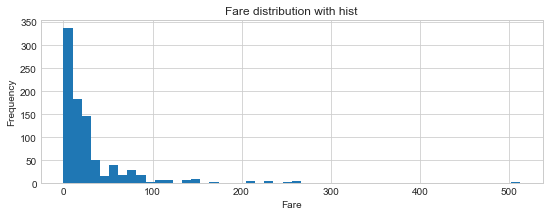

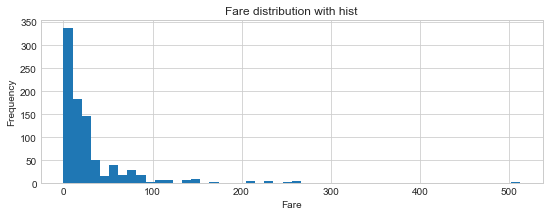

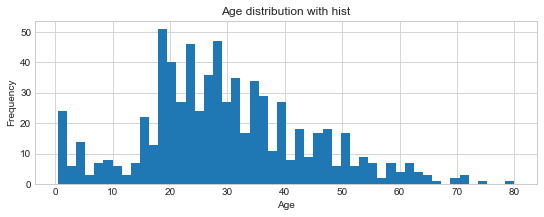

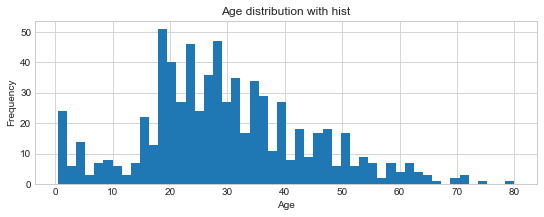

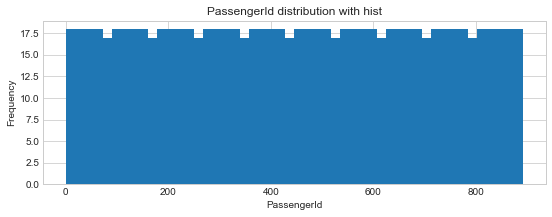

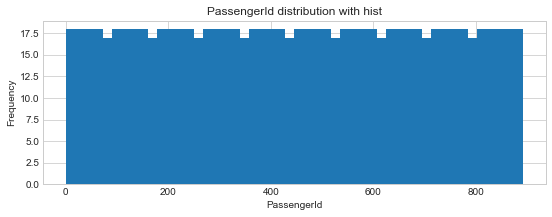

In [14]:
#numeric variable'lerin listesini oluşturalım.

numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

Çıktıda Fare, Age ve PassengerId için histogramları görmekteyiz.

Çıktıyı inceleyelim. Fare feature'si biletlere ödenen para miktarını ifade eder. Histogramda görüldüğü üzere 100 doların üzerinde veren kişi sayısı çok az. Böylelikle ödenen paranın dağılımını elde edebiliyoruz.

Age feature'sine ait histograma baktığımızda, 20 ve 30 yaşları arasında bir toplanma görünüyor. 70 yaşından büyük yolcu sayısı giderek azalıyor ve 0 ile 10 yaş arasında fazla sayıda çocuk olduğu gözlemlenebiliyor.

<font color = 'Orange'>
4-BASIC DATA ANALYSIS

Bazı feature'lerin birbirleriyle ilişkilerini incelicez:

Pclass - survived

Sex - survived

SibSp - survived

Parch - survived

In [15]:
train_df[["Pclass","Survived"]]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


Data frame içerisinde bulunan diğer feature'leri yok sayarak sadece Pclass ve Survived 'ı elde ettik.

In [16]:
#Pclass vs survived 
#İnsanların sınıfları ile hayatta kalmaları arasında nasıl bir orantı olduğunu inceleyelim.

train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


 Pclass'ın survived'a olan etkisini görmek için Pclass ve survived'i içeren data frame'i Pclass'a göre groupby yaparız. groupby ile grupladıktan sonra neye göre yazdırma yapması gerektiğini belirtmeliyiz. Burada grupla ve ortalamasını göster dedik.
 
 Sonucu sıralı göstermek için şöyle yaparız:

In [17]:
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Çıktıyı yorumlayalım. 1.sınıf kategoriye sahip yolcuların hayatta kalma olasılıklarının 0.62 olduğunu görüyoruz. Yani %62 olasılıkla 1.sınıftaki bir yolcu titanik gemi kazası sonucunda hayatta kalmış. 3.sınıfta kalan bir yolcu kaza sonucunda %24 olasılığında hayatta kalmış.

Şimdide cinsiyet (Sex) ile hayatta kalma (Survived) oranı arasındaki ilişkiyi incceleyelim.

In [18]:
#Sex vs survived

train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


,Sex,Survived
0,female,0.742038
1,male,0.188908


Çıktıyı yorumlayalım. Kadınlar %74 oranında hayatta kalmış ve erkekler %18 oranında hayatta kalmış. 

Şimdi de bir kadeşe veya eşe sahip olma durumu ile hayatta kalma arasındaki ilişkiyi inceleyelim.

In [19]:
#SibSp vs survived

train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Veri setinden SibSp ve Survived feature'lerini aldım. SibSp feature'sine göre gruplama yaptım. Ve hayatta kalmanın ortalamasına bakmak için mean() metodunu kullandım. Ve sonra ortalamayı azalan sırada çıktıya yansıttım.

Çıktıyı yorumlayalım. Yanında 1 tane kardeşi ya da eşi olan yolcuların hayatta kalma olasılığı %53 ile en yüksek orana sahip. Yanında 2 kişi olanların hayatta kalma oranları %46, gemiye yalnız binenlerin hayatta kalma oranı %34 dür. Yanına 2 'den fazla kişi olanların hayatta kalma oranlarının çok daha az olduğu görülmektedir.

Mesela bu çıktıdan yeni bir feature elde edebiliriz. 7 tane kategoriyi 2 tane kategoriye düşürelim. Bir tane threshold belirleriz. 2 sayısı threshold olsun. 2 ve 2'nin altındakileri bir gruba toplarım ve bunların hayatta kalma olasılıkları 2'den büyüklere göre çok daha yüksek olur.  

In [20]:
#Parch vs survived

train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Parch ile Survived feature'lerini birleştirdim yani bir araya topladım. Sonrasında bunları Parch feature'sine göre grupladım ve sonra ortalamalarını aldım. Sonrada sonucu azalan sırada yazdırdım.

Çıktıyı yorumlayalım. Yolcunun yanında ebeveyn veya çocuk olmak üzere 3 kişi var ise %60 oranında hayatta kalma durumu söz konusu. 

Parch değeri arttıkça yani 4, 5 ve 6 değerleri için görüldüğü üzere hayatta kalma olasılığı azalıyor. 

Sonuç olarak, birbirleriyle alakasız feature'ler keşfedersek bunlardan yeni feature oluşturabiliriz. Ya da bunları ayrı ayrı kullanabiliriz. 

<font color = 'Orange'>
4-OUTLIER DETECTION

Outlier kavramını hatırlayalım. Mesela bir iş yerinde çalıştığınızı düşünün. Ve sırasıyla 1,4,5,6,8,9,11,12,13,14,15,16,17,100 şeklinde maaşlar var. Burdan outlier'ı yani ayrık olan sayıyı bulmaya çalışıcaz. 

Outlier detection şu yüzden önemli: Modeli düzgün bir şekilde eğitebilmemiz için istatistiksel anlamda belli başlı veriyi bozan ayrık değerlerden kurtulmamız gerekiyor. 

1,4,5,6,8,9,11,12,13,14,15,16,,17100 sayılarının ortalaması 52'dir. Patron çalışanlara verdiği ortalama maaşa göre zam yapıcak diyelim. Patron ortalamanın 52 olduğunu gördüğünde bu değer çok iyi olduğu için zam yapmaktan vazgeçer. Ama bu 52 değerini ortaya çıkartan 100 değeridir. Bu 100 sayısı outlier'dir. Yani kısacası istatistiksel anlamda veriyi bozan sample'leri outlier olarak adlandırabiliriz.

Başka bir deyişle, öyle bir değer düşünün ki verinin geri kalan değerlerinden çok büyük ya da çok küçük. İşte bu değer outlier'dır.

Peki outlier'ı çıkartmak neden önemli?: Çünkü bu durum istatistiksel anlamda karar vermemizi zorlaştırır. Mesela patron 50 değerini duyunca çalışanlarına verdiği maaşın iyi olduğunu ve zam yapmasına gerek olmadığını düşünecek. Ama bu 50 değerini elde etmemize sebep olan 100 değerinde maaşa sahip olan kişidir. Geri kalan çalışanların maaşı 50'den çok daha azdır. Buradaki outlier'ı tespit edip çıkarırsak ortalama 12 olur ve patron zam yapma kararı alır.

Şimdi outlier'ı nasıl bulacağımıza bakalım.

Öncelikle 1 st quartile = Q1 şeklinde bir tanım var.

3 rd quartile = Q3

Q1 ve Q3 quartile'leri tespit edebilmemiz için arada 2 nd quartile dediğimiz ve median olarak adlandırdığımız Q2 değeri var.

Median: Listenin içerisinde bulunan sayıların ortasındaki sayıdır. Yukarıdaki listede, sağ tarafta 7 tane sol tarafta 7 tane sayı olacak şekilde konumlandığımızda ortadaki sayı 11.5'tir. 11.5 sayısı median değeridir. 


                      Median
1  4  5  6  8  9  11   11.5   12  13  14  15  16  17  100

Q1 değeri median ile 1 değeri arasındaki sayıların ortasındaki sayıdır. Bu durumda Q1=6 'dır.

Q3 değeri ise median ile 100 değeri arasındaki sayıların ortasındaki sayıdır. Bu durumda Q3=15 'dir.

IQR = Q3-Q1 = 9

Bu 9 sayısını 1.5 ile çarpımı outlier tespitindeki adımımızdır.

outlier = 9 x 1.5 = 13.5

Şimdide:

Q1 - 13.5             ya da       Q3 + 13.5

6 - 13.5 = -7.5                   15 + 13.5 = 28.5

Şimdi bu elde ettiğimiz değerleri listede sıralama açısından uygun yerlere yerleştirelim.

-7.5  1  4  5  6  8  9  11   11.5   12  13  14  15  16  17  28.5  100

Burada -7.5 ve 28.5 aralığın dışındaki sayılar outlier'dır. Burada bu aralığın dışında kalan sayı 100 dür ve 100 değerinin outlier olduğunu tespit etmiş olduk.

Bu diziden sağlıklı istatistiksel sonuçlar çıkarabilmek için 100 sayısını listeden çıkarmamız gerekmektedir. Eğer outlier'ı yani 100 sayısını çıkartmazsak istatistiksel anlamda doğru bilgiler elde edemem. Dolayısıyla machine learning modelimizi doğru bir şekilde eğitemeyiz.

In [21]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        
        # IQR
        IQR = Q3-Q1
        
        # Outlier step
        outlier_step = IQR*1.5
        
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1-outlier_step) | (df[c] > Q3+outlier_step)].index 
        #Bir yukarıdaki kod ile outlier'ları içerisinde bulunduran bir data frame elde etmiş oluyoruz. Outlier'ların indeksini almak içinde .index yazarız.
        
        #store indeces (Bu adım ile amaçlanan, bulduğumuz indeksleri depolarız ve böylece daha sonradan bunları çıkarabiliriz)
        outlier_indices.extend(outlier_list_col) #indeksleri outlier_indices'in içerisinde depolamış oldum. 

    outlier_indices = Counter(outlier_indices)  #Bu satır ile hangi yolcunun kaç tane outlier içerdiğini öğrenebiliriz.
    
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) #Eğer bir tane sample'de 2'den fazla outlier var ise bunu çıkartmak için indeksini tutarız. Ama bir tane outlier var ise çıkartmayız.
    
    return multiple_outliers

Yukarıdaki kodu anlatalım. metod parametre olarak data frame'i ve outlier'ı detect etmek için kullanacağımız feature'leri alır.

Sayısal değerler için outlier detection yaparız. Feature'leri bir for döngüsünde döndürerek tüm outlier'ları tespit ettik.

Counter() metodu listenin içerisinde bulunan elemanların kaçar tane olduğunu hesaplar.

Counter() metodunun sonucuna ihtiyacımız var çünkü bir yolcunun tek bir feature için outlier'ı var ise o yolcuyu çıkartmak çok doğru olmaz fakat birden fazla feature için outlier değeri var ise yolcuyu yani sample'ı çıkartmak gerekbilir.

In [22]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]  #outlier'ları tespit etmek istediğimiz feature'leri yazdık.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Çıktıda outlier'ları görüyoruz. 

Şimdide outlier'ları kaldıralım.

In [23]:
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

<font color = 'Orange'>
5-MISSING VALUE

Veri setinde non value olarak adlandırabileceğimiz missing yani boş değerlere bakıcaz. Boş değerleri herhangi bir machine learning modelini eğitmek için kullanamayacağımıza göre onlardan nasıl kurtulacağımıza veya onları nasıl dolduracağımıza bakalım.

Missing value içerisinde iki tane alt başlık bulunmakta:

<font color = 'Red'>
    🟢 Find Missing Value
    
<font color = 'Red'>    
   🟢 Fill Missing Value

Missing value'leri bulmadan önce data frame'leri birleştirmemiz gerek. Data frame'leri birleştirmekten kasıt şudur: bir train_df miz var. Birde test_df miz var. Missing value'leri atabilmek ya da onları doldurabilmek için test data frame'in içerisindeki değerlerede bbakmalıyız. Çünkü eğer missing value'leri sadece train data frame'inde doldurursak bunların machine learning'te eğitimini gerçekleştirdiğimiz zaman bu machine learning modelimiz test data frame'in içerisindeki boş değerleri gördüğü zaman hata verecektir, bunları tanıyamayacaktır. Bu nedenle train ve test data frame'lerini birleştiricez ve daha sonrada missing value problemini ortadan kaldırıcaz.

In [24]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)  #Yukarıdan aşşağıya train_df ve test_df'yi birleştirdik.

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Find Missing Value

In [26]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

train data frame'in içerisinde herhangi bir null değere sahip olup olmadığını bulduk ve hangi feature'lerde missing value olduğunu tespit ettik. 

Çıktıda missing value'lerin hangi feature'lerde olduğunu görebiliriz. Birde kaç tane olduğunu öğrenelim.

In [27]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

256 tane sample'de age ile ilgili feature boş. Yani 256 tane yolcunun yaş değeri bilinmiyor. 1007 tane yolcunun Cabin bilgisine sahip değiliz. 2 tane yolcunun hangi limandan (Embarked) bindiğini bilmiyoruz. 1 tane yolcunun biletini ne kadar fiyata satın aldığını (Fare) bilmiyoruz. 418 yolcununda hayatta kalıp kalmadığını bilmiyoruz. 

Survived 'a karşılık gelen 418 değeri test data frame'in boyutuna eşit oluyor çünkü 418 adet bilinmemesi onun test veri seti olmasından kaynaklı.

## Fill Missing Value

Embarked ve Fare feature'lerinin missing value'lerini dolduralım.

Missing value'leri doldurmak yerine train veri setinden çıkartmak isteyebiliriz ama veriyi kaybetmektense doldurmak tercihimizdir.

In [28]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Çıktıda görüldüğü üzere, 60 ve 821. id 'lere sahip iki yolcunun nereden bindikleri belli değil. Bunu Embarked sütunundaki değerlerin NaN olmasından anladık. 

Bu NaN değerleri şunlara göre doldurabiliriz:

Pclass feature'sini baz alarak 1.sınıfa ait yolcuların hangi limandan bindiğine bakarız ve elde ettiğimiz bilgi ile Embarked feature'sindeki NaN değerleri doldurabiliriz.

Fare feature'si baz alınarak ta doldurma işlemi yapılabilir. Aşağı yukarı 80.0 para ödeyen insanların hangi limandan bindiklerine bakarız ve ona göre Embarked featuresindeki NaN değerleri doldurabiliriz.

Fare feature'sini kullanarak analiz yapalım.

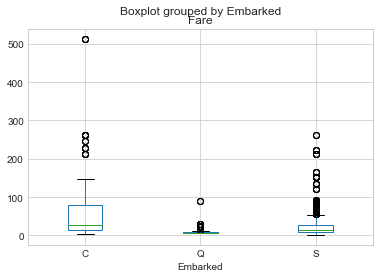

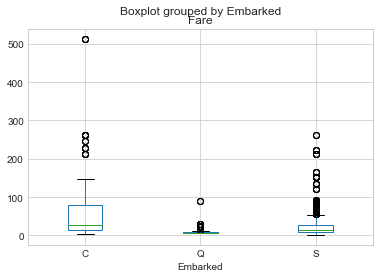

In [29]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

Medyan değerleri her bir dikdörtgenin ortasındaki çizgidir. C'nin ortasındaki çizgi 100 değerine yakın. Q'daki meydan değeri çok düşük bu durumda bunların ödedikleri para çok az ve dolayısıyla bunların sahip oldukları cabin'ler ve Pclass değerleri çok düşük yani bunlar büyük ihtimalle 3.sınıfta seyahat eden yolculardır ve bunlar genellikle Q limanından binmişler. S 'nin medyan değeri C'ye göre daha düşüktür ve bunun anlamı S limanından binen yolcular büyük ihtimal 2.sınıfta seyahat edenlerdir. 

Embarked değeri NaN olan iki yolcunun Fare değerleri 80 miş. 80'e en yakın C dir ve bu durumda C limanından binmiş olma olasılıkları çok yüksektir. Dolayısıyla bu iki yolcunun Embarked değerlerini C olarak doldurabiliriz.

In [30]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")

Yukarıdaki kod ile boş olan Embarked değerlerinin C ile doldurulması sağlanmıştır.

Şimdi doldurabilmişmiyiz kontrol edelim.

In [31]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Çıktıda görüldüğü üzere artık Embarked feature'sinde herhangi bir boş değer bulunmamaktadır.

Şimdide hangi yolcumuzun Fare değerinin olmadığına bakalım. 

In [32]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


1033 nolu yolcunun Fare değeri yok yani bu yolcunun ne kadar para ödediğini bilmiyoruz. 

Burda yola çıkabileceğimiz iki tane featur var. Birincisi hangi limandan bindiği (Embarked) ve diğeri sınıfı (Pclass).

Pclass featuresinden yola çıkalım.

In [33]:
np.mean(train_df[train_df["Pclass"]==3]["Fare"])

12.741219971469327

12.741219971469327

Pclass'ı 3 değerine sahip olan yolcuları listeledik. Bunu kullanarak sadece Fare 'e baktık. Ve bunların ortalamasını aldık. Böylece 3.sınıfta seyahat eden yolcuların ortalama ne kadar ödedikleri bilgisini elde ettik.

Ortalama 12.7 tutarında ödeme yapmışlar. Şimdi Fare featuresindeki NaN değerleri 12.7 ile dolduralım.

In [34]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))

In [35]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Çıktıda görüldüğü üzere artık Fare featuresinde herhangi bir boş değer bulunmamaktadır.